In [69]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

In [70]:
ph=1.5574E-4
times=[1,2,3,6,7,9,13,16,21,24,31] 

In [71]:
def islinear(data):
    pca = PCA() # Compute PCA
    pca.fit_transform(data)
    eigenvalues = pca.explained_variance_ # Get eigenvalues
    eigenvalues = np.round(eigenvalues, 7) # Round off eigenvalues
    islin=len([x for x in eigenvalues if x >0])!=2
    print("is linear ",islin)
    return islin 

In [72]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
pept=[x.split('_1_')[0] for x in os.listdir(path) if ((".csv" in x) and ("_1_" in x)) ]

In [73]:
from sklearn.metrics import r2_score,mean_squared_error 
def estimateneh(const):
    if not const or len(const)==0:
        return None
    
    plt.scatter(times,const,c='k',s=120)
    plt.ylabel("px(t)*NEH")
    plt.xlabel("Time")
    
#     ========================

    res=[]
    for neh in range(100):
        sum_er=0 
        for i in range(len(times)):
            pxt=[(x/10000) for x in list(range(1,500,1))]
            diff=[abs(const[i]-neh*x) for x in pxt]
            sum_er+=min(diff)
        res.append(sum_er)
    
    # bet neh val    
#     nehval=res.index(min(res))
    nehval=0
    for i,val in enumerate(res):
        diff=float('inf')
        if i!=0:
            diff=res[i-1]-val

        if(diff <0.001):
            nehval=i
            print("NEH=",i-1)
            break
#         print(i,val/11,abs(diff))
    
    # compute the points for best neh val
    temp_const=[]
    for i in range(11):
        pxt=[(x/10000) for x in list(range(1,500,1))]
        diff=[abs(const[i]-nehval*x) for x in pxt]
        temp_const.append(pxt[diff.index(min(diff))]*nehval) 
    
    plt.scatter(times,temp_const,c='r',s=40)    
    plt.show()
    
    corr_matrix = np.corrcoef(const, temp_const)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    r2=r2_score(const, temp_const)
    rmse=(mean_squared_error(const, temp_const))**0.5

    print("**************","RMSE=",rmse,"R square=",r2)
    print(temp_const)
    
    print("\n estimated NEH",nehval)
    plt.figure(figsize=(10,6))
    plt.scatter(range(100),res,s=10,c='k')
    plt.xlabel("NEH")
    plt.ylabel("Error")
    plt.show()
#     ========================
    
    return nehval


 _AcVDTALENLSTLK_2 Time 1 ==================================>
pxt*NEH = 0.1632 real_NEH= 23 ratio = 0.007095652173913044 

vals 0.1276168851161491

 _AcVDTALENLSTLK_2 Time 2 ==================================>
pxt*NEH = 0.399000105 real_NEH= 23 ratio = 0.017347830652173914 

vals 0.36044742560802073

 _AcVDTALENLSTLK_2 Time 3 ==================================>
pxt*NEH = 0.41730010700000003 real_NEH= 23 ratio = 0.01814348291304348 

vals 0.33000407535697557

 _AcVDTALENLSTLK_2 Time 6 ==================================>
pxt*NEH = 0.92720475 real_NEH= 23 ratio = 0.04031325 

vals 1.110945761810987

 _AcVDTALENLSTLK_2 Time 7 ==================================>
pxt*NEH = 0.9820052 real_NEH= 23 ratio = 0.04269587826086957 

vals 0.9223413771954793

 _AcVDTALENLSTLK_2 Time 9 ==================================>
pxt*NEH = 0.972005 real_NEH= 23 ratio = 0.04226108695652174 

vals 1.0953439878799884

 _AcVDTALENLSTLK_2 Time 13 ==================================>
pxt*NEH = 1.0890057199999998 real

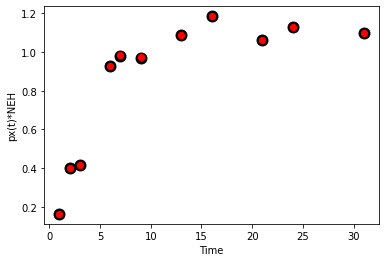

************** RMSE= 0.000631994877350812 R square= 0.9999965036611144
[0.1625, 0.4, 0.4175, 0.9275, 0.9825, 0.9724999999999999, 1.09, 1.185, 1.065, 1.1325, 1.0975000000000001]

 estimated NEH 25


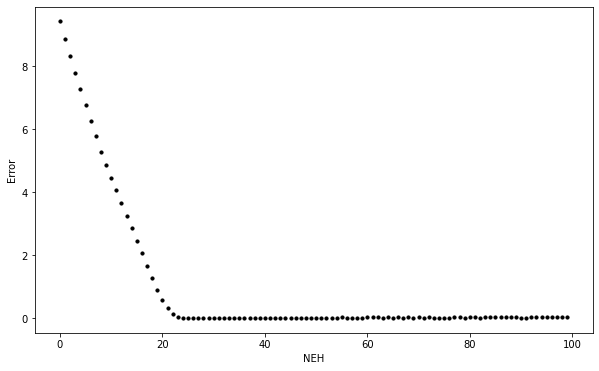


True NEH = 23 	 estimated NEHs median 25




 _DAMLENQTPELFQDVNKPK_3 Time 1 ==================================>
pxt*NEH = 0.252 real_NEH= 37 ratio = 0.0068108108108108105 

vals 0.10096559343419198

 _DAMLENQTPELFQDVNKPK_3 Time 2 ==================================>
pxt*NEH = 0.727499325 real_NEH= 37 ratio = 0.01966214391891892 

vals 0.29757862290242104

 _DAMLENQTPELFQDVNKPK_3 Time 3 ==================================>
pxt*NEH = 0.7655995360000001 real_NEH= 37 ratio = 0.020691879351351354 

vals 0.3317947964145975

 _DAMLENQTPELFQDVNKPK_3 Time 6 ==================================>
pxt*NEH = 1.4820078 real_NEH= 37 ratio = 0.040054264864864866 

vals 0.9953763447225414

 _DAMLENQTPELFQDVNKPK_3 Time 7 ==================================>
pxt*NEH = 1.44710783 real_NEH= 37 ratio = 0.03911102243243243 

vals 1.0905010924950482

 _DAMLENQTPELFQDVNKPK_3 Time 9 ==================================>
pxt*NEH = 1.53140806 real_NEH= 37 ratio = 0.04138940702702702 

vals 1.4245772309715403

 _DAMLENQ

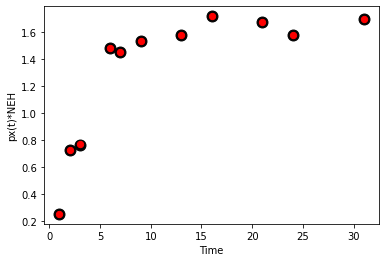

************** RMSE= 0.000964664145805012 R square= 0.9999958017815785
[0.252, 0.7272, 0.7667999999999999, 1.4832, 1.4472, 1.53, 1.5768, 1.7136, 1.6703999999999999, 1.5768, 1.6956000000000002]

 estimated NEH 36


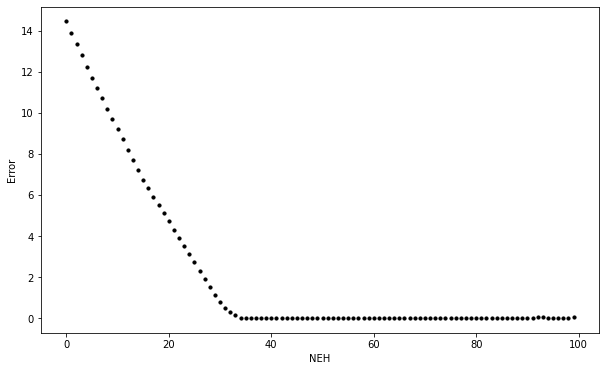


True NEH = 37 	 estimated NEHs median 36




 _FPQLDDTSFANSR_2 Time 1 ==================================>
pxt*NEH = 0.18 real_NEH= 26 ratio = 0.006923076923076922 

vals 0.09470633412865287

 _FPQLDDTSFANSR_2 Time 2 ==================================>
pxt*NEH = 0.48499990299999995 real_NEH= 26 ratio = 0.01865384242307692 

vals 0.3130234550456242

 _FPQLDDTSFANSR_2 Time 3 ==================================>
pxt*NEH = 0.4416 real_NEH= 26 ratio = 0.016984615384615383 

vals 0.29669866489079133

 _FPQLDDTSFANSR_2 Time 6 ==================================>
pxt*NEH = 1.0766990300000001 real_NEH= 26 ratio = 0.04141150115384616 

vals 0.6328115944445515

 _FPQLDDTSFANSR_2 Time 7 ==================================>
pxt*NEH = 0.99909903 real_NEH= 26 ratio = 0.03842688576923077 

vals 0.8208668044417566

 _FPQLDDTSFANSR_2 Time 9 ==================================>
pxt*NEH = 1.13279904 real_NEH= 26 ratio = 0.04356919384615385 

vals 0.8152827548392036

 _FPQLDDTSFANSR_2 Time 13 =================

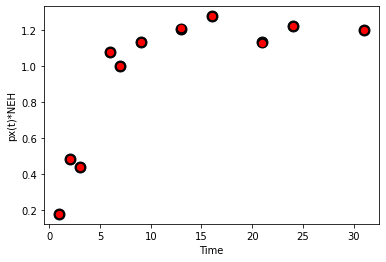

************** RMSE= 0.000872437036874225 R square= 0.9999942753910188
[0.1809, 0.486, 0.4428, 1.0773, 0.999, 1.1340000000000001, 1.2096, 1.2771000000000001, 1.1313, 1.2231, 1.1988]

 estimated NEH 27


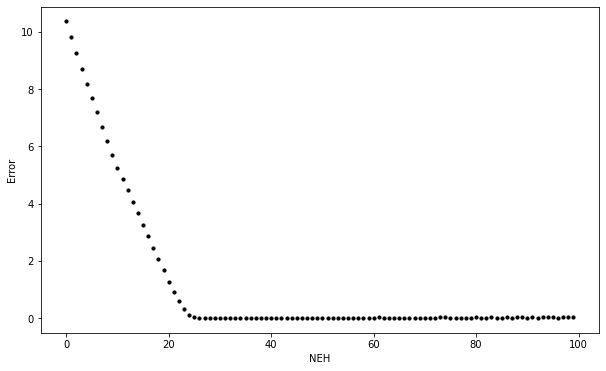


True NEH = 26 	 estimated NEHs median 27




 _GNAGQTNYGFANSTMER_2 Time 1 ==================================>
pxt*NEH = 0.186 real_NEH= 36 ratio = 0.005166666666666667 

vals 0.16225419564814075

 _GNAGQTNYGFANSTMER_2 Time 2 ==================================>
pxt*NEH = 0.576299887 real_NEH= 36 ratio = 0.016008330194444444 

vals 0.33382072056733453

 _GNAGQTNYGFANSTMER_2 Time 3 ==================================>
pxt*NEH = 0.666699661 real_NEH= 36 ratio = 0.018519435027777777 

vals 0.4543201261545663

 _GNAGQTNYGFANSTMER_2 Time 6 ==================================>
pxt*NEH = 1.3720072799999998 real_NEH= 36 ratio = 0.03811131333333333 

vals 1.4971800215134812

 _GNAGQTNYGFANSTMER_2 Time 7 ==================================>
pxt*NEH = 1.32869897 real_NEH= 36 ratio = 0.03690830472222222 

vals 1.080520011836339

 _GNAGQTNYGFANSTMER_2 Time 9 ==================================>
pxt*NEH = 1.43840783 real_NEH= 36 ratio = 0.03995577305555556 

vals 1.499021718181375

 _GNAGQTNYGFANSTMER_2 

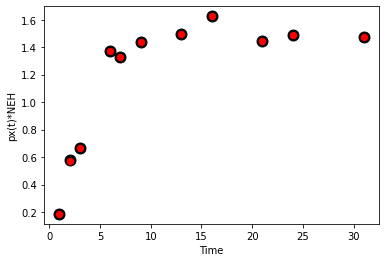

************** RMSE= 0.0011418708285962193 R square= 0.9999937364098528
[0.187, 0.5746, 0.6664, 1.3736, 1.3294000000000001, 1.4382, 1.496, 1.6252, 1.4484, 1.4891999999999999, 1.4722]

 estimated NEH 34


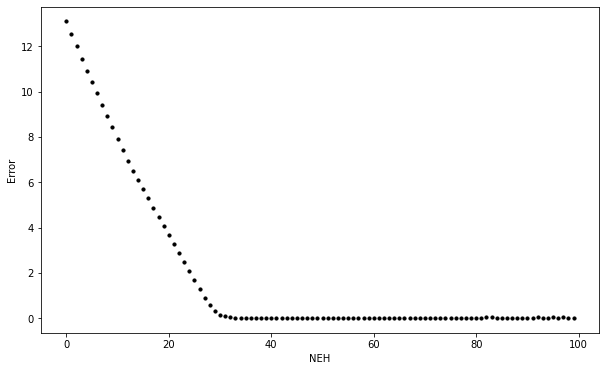


True NEH = 36 	 estimated NEHs median 34




 _LDPGSPELQQVLK_2 Time 1 ==================================>
pxt*NEH = 0.165 real_NEH= 26 ratio = 0.006346153846153847 

vals 0.16930867994373772

 _LDPGSPELQQVLK_2 Time 2 ==================================>
pxt*NEH = 0.406600107 real_NEH= 26 ratio = 0.015638465653846155 

vals 0.3224289050174441

 _LDPGSPELQQVLK_2 Time 3 ==================================>
pxt*NEH = 0.39590000000000003 real_NEH= 26 ratio = 0.015226923076923079 

vals 0.2507635264975957

 _LDPGSPELQQVLK_2 Time 6 ==================================>
pxt*NEH = 1.0199985 real_NEH= 26 ratio = 0.03923071153846154 

vals 0.9573392862792397

 _LDPGSPELQQVLK_2 Time 7 ==================================>
pxt*NEH = 0.97499925 real_NEH= 26 ratio = 0.03749997115384615 

vals 1.025131562199584

 _LDPGSPELQQVLK_2 Time 9 ==================================>
pxt*NEH = 1.0874985000000001 real_NEH= 26 ratio = 0.04182686538461539 

vals 1.1113789231996705

 _LDPGSPELQQVLK_2 Time 13 =============

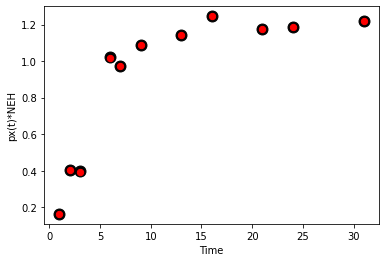

************** RMSE= 0.0007085394156771839 R square= 0.9999963907921071
[0.1638, 0.40559999999999996, 0.3952, 1.0191999999999999, 0.975, 1.0868, 1.1414, 1.2454, 1.1778, 1.1856, 1.2193999999999998]

 estimated NEH 26


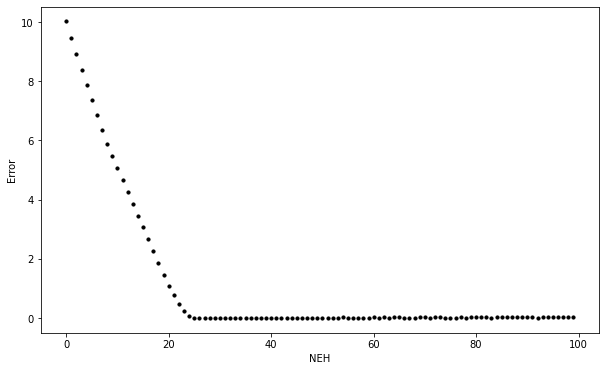


True NEH = 26 	 estimated NEHs median 26




 _LFDHPEVPTPPESASVSR_3 Time 1 ==================================>
pxt*NEH = 0.198 real_NEH= 40 ratio = 0.00495 

vals 0.19363305277411993

 _LFDHPEVPTPPESASVSR_3 Time 2 ==================================>
pxt*NEH = 0.5428 real_NEH= 40 ratio = 0.013569999999999999 

vals 0.37984289153000866

 _LFDHPEVPTPPESASVSR_3 Time 3 ==================================>
pxt*NEH = 0.545199884 real_NEH= 40 ratio = 0.0136299971 

vals 0.3889326102604487

 _LFDHPEVPTPPESASVSR_3 Time 6 ==================================>
pxt*NEH = 1.29480702 real_NEH= 40 ratio = 0.0323701755 

vals 1.1734545958569684

 _LFDHPEVPTPPESASVSR_3 Time 7 ==================================>
pxt*NEH = 1.3199985 real_NEH= 40 ratio = 0.0329999625 

vals 1.0614642600306827

 _LFDHPEVPTPPESASVSR_3 Time 9 ==================================>
pxt*NEH = 1.44710783 real_NEH= 40 ratio = 0.03617769575 

vals 1.4848937265344802

 _LFDHPEVPTPPESASVSR_3 Time 13 ==================================>
px

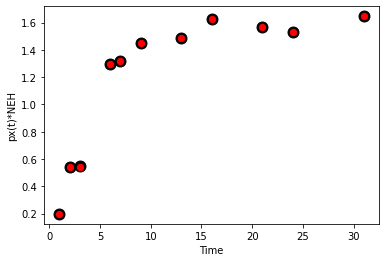

************** RMSE= 0.0011647307630074843 R square= 0.9999943838673727
[0.1972, 0.544, 0.544, 1.2954, 1.3192, 1.4484, 1.4891999999999999, 1.6286, 1.5674000000000001, 1.53, 1.6456]

 estimated NEH 34


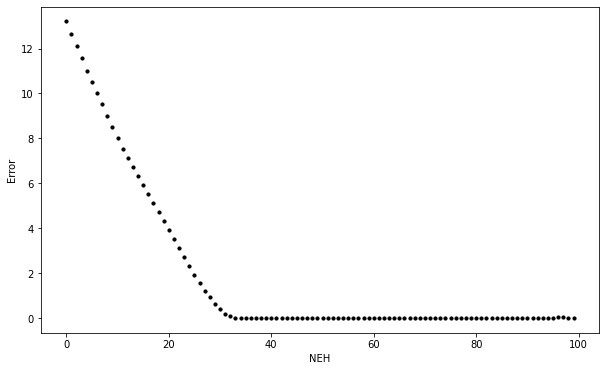


True NEH = 40 	 estimated NEHs median 34




 _LGMLSPDGTcR_2 Time 1 ==================================>
pxt*NEH = 0.1023 real_NEH= 18 ratio = 0.005683333333333334 

vals 0.06786086046187167

 _LGMLSPDGTcR_2 Time 2 ==================================>
pxt*NEH = 0.33 real_NEH= 18 ratio = 0.018333333333333333 

vals 0.27482894395884694

 _LGMLSPDGTcR_2 Time 3 ==================================>
pxt*NEH = 0.3318 real_NEH= 18 ratio = 0.018433333333333333 

vals 0.22742051007108582

 _LGMLSPDGTcR_2 Time 6 ==================================>
pxt*NEH = 0.6974994 real_NEH= 18 ratio = 0.03874996666666666 

vals 0.5844956538443645

 _LGMLSPDGTcR_2 Time 7 ==================================>
pxt*NEH = 0.6749994 real_NEH= 18 ratio = 0.03749996666666667 

vals 0.6247892054918708

 _LGMLSPDGTcR_2 Time 9 ==================================>
pxt*NEH = 0.742499325 real_NEH= 18 ratio = 0.0412499625 

vals 0.6756472202916952

 _LGMLSPDGTcR_2 Time 13 ==================================>
pxt*NEH = 0.76499925 r

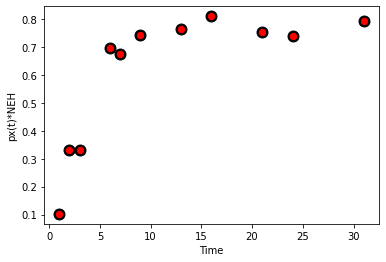

************** RMSE= 0.0005105175019192975 R square= 0.9999950441967617
[0.1026, 0.3294, 0.3312, 0.6966, 0.6749999999999999, 0.7416, 0.765, 0.8099999999999999, 0.7542, 0.7398, 0.7938000000000001]

 estimated NEH 18


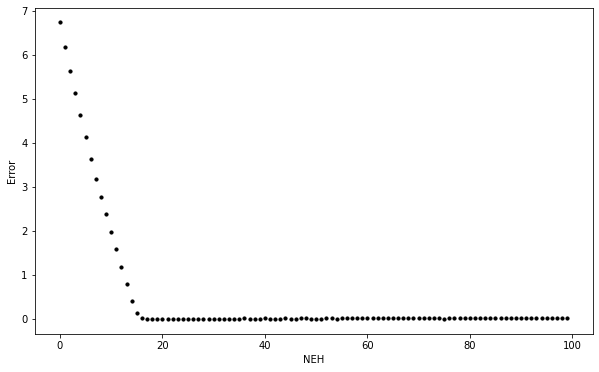


True NEH = 18 	 estimated NEHs median 18




 _LKEDTQVADVTTSR_3 Time 1 ==================================>
pxt*NEH = 0.16119999999999998 real_NEH= 24 ratio = 0.006716666666666666 

vals 0.15273962942437677

 _LKEDTQVADVTTSR_3 Time 2 ==================================>
pxt*NEH = 0.436800112 real_NEH= 24 ratio = 0.01820000466666667 

vals 0.3628830835676231

 _LKEDTQVADVTTSR_3 Time 3 ==================================>
pxt*NEH = 0.3996 real_NEH= 24 ratio = 0.01665 

vals 0.34477360676702284

 _LKEDTQVADVTTSR_3 Time 6 ==================================>
pxt*NEH = 1.0649985 real_NEH= 24 ratio = 0.044374937499999996 

vals 1.0482316630055584

 _LKEDTQVADVTTSR_3 Time 7 ==================================>
pxt*NEH = 0.8960036 real_NEH= 24 ratio = 0.037333483333333334 

vals 0.9664492361674214

 _LKEDTQVADVTTSR_3 Time 9 ==================================>
pxt*NEH = 1.06579854 real_NEH= 24 ratio = 0.044408272500000005 

vals 1.043950889520227

 _LKEDTQVADVTTSR_3 Time 13 ========================

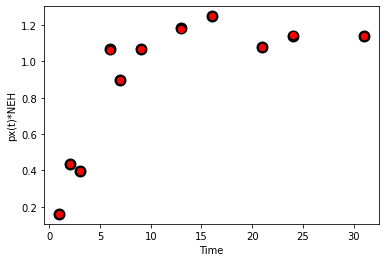

************** RMSE= 0.0007310255869880616 R square= 0.9999958328257904
[0.162, 0.43739999999999996, 0.3996, 1.0637999999999999, 0.8964, 1.0665, 1.1799000000000002, 1.2473999999999998, 1.08, 1.1421, 1.1367]

 estimated NEH 27


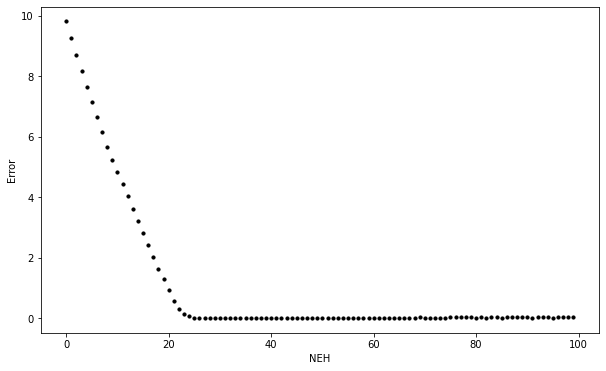


True NEH = 24 	 estimated NEHs median 27




 _LLLPEDPLISGLLNSQALK_2 Time 1 ==================================>
pxt*NEH = 0.165 real_NEH= 33 ratio = 0.005 

vals 0.07983203954742728

 _LLLPEDPLISGLLNSQALK_2 Time 2 ==================================>
pxt*NEH = 0.5382 real_NEH= 33 ratio = 0.01630909090909091 

vals 0.2518512268084969

 _LLLPEDPLISGLLNSQALK_2 Time 3 ==================================>
pxt*NEH = 0.5236000000000001 real_NEH= 33 ratio = 0.015866666666666668 

vals 0.20828615887446

 _LLLPEDPLISGLLNSQALK_2 Time 6 ==================================>
pxt*NEH = 1.3473072899999998 real_NEH= 33 ratio = 0.04082749363636363 

vals 1.2219136113930147

 _LLLPEDPLISGLLNSQALK_2 Time 7 ==================================>
pxt*NEH = 1.2584065 real_NEH= 33 ratio = 0.0381335303030303 

vals 1.2773787326578456

 _LLLPEDPLISGLLNSQALK_2 Time 9 ==================================>
pxt*NEH = 1.39160756 real_NEH= 33 ratio = 0.04216992606060606 

vals 1.2664974611022934

 _LLLPEDPLISGLLNSQALK_2 Tim

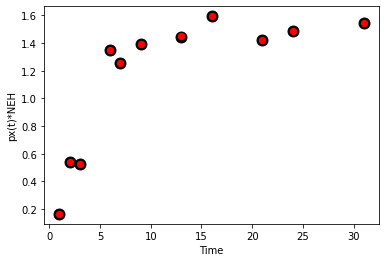

************** RMSE= 0.0009211991702863908 R square= 0.9999962296201467
[0.165, 0.5378999999999999, 0.5247, 1.3464, 1.2573, 1.3926, 1.4487, 1.5939, 1.4223, 1.4883, 1.5476999999999999]

 estimated NEH 33


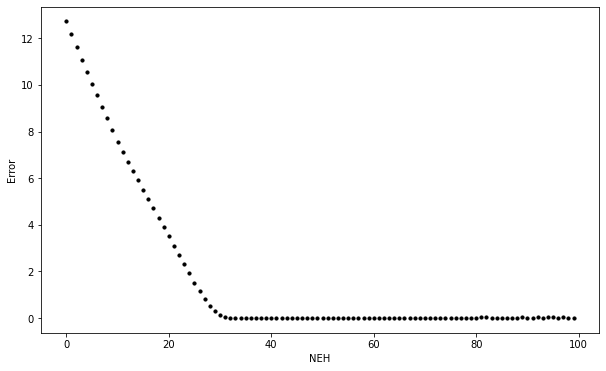


True NEH = 33 	 estimated NEHs median 33




 _LLLPEDPLISGLLNSQALK_3 Time 1 ==================================>
pxt*NEH = 0.171 real_NEH= 33 ratio = 0.005181818181818182 

vals 0.11391863834547308

 _LLLPEDPLISGLLNSQALK_3 Time 2 ==================================>
pxt*NEH = 0.561599883 real_NEH= 33 ratio = 0.017018178272727273 

vals 0.4025189379602456

 _LLLPEDPLISGLLNSQALK_3 Time 3 ==================================>
pxt*NEH = 0.5236000000000001 real_NEH= 33 ratio = 0.015866666666666668 

vals 0.32550773458776233

 _LLLPEDPLISGLLNSQALK_3 Time 6 ==================================>
pxt*NEH = 1.3423049599999999 real_NEH= 33 ratio = 0.04067590787878787 

vals 1.1785581291773437

 _LLLPEDPLISGLLNSQALK_3 Time 7 ==================================>
pxt*NEH = 1.2899985 real_NEH= 33 ratio = 0.03909086363636364 

vals 1.326503327664289

 _LLLPEDPLISGLLNSQALK_3 Time 9 ==================================>
pxt*NEH = 1.37480728 real_NEH= 33 ratio = 0.041660826666666664 

vals 1.3969562334747005

 _

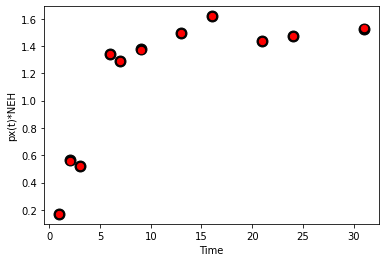

************** RMSE= 0.001055169861491067 R square= 0.9999950428777433
[0.17, 0.561, 0.5236000000000001, 1.343, 1.2886000000000002, 1.3736, 1.4926000000000001, 1.6184, 1.4382, 1.4756, 1.53]

 estimated NEH 34


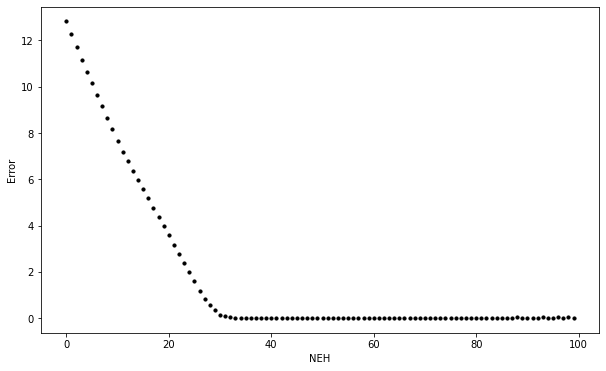


True NEH = 33 	 estimated NEHs median 34




 _QGIQVLVSTSNVSSLEGAR_2 Time 1 ==================================>
pxt*NEH = 0.165 real_NEH= 39 ratio = 0.004230769230769231 

vals 0.1004777208595419

 _QGIQVLVSTSNVSSLEGAR_2 Time 2 ==================================>
pxt*NEH = 0.5175 real_NEH= 39 ratio = 0.013269230769230768 

vals 0.3759111793123378

 _QGIQVLVSTSNVSSLEGAR_2 Time 3 ==================================>
pxt*NEH = 0.581399886 real_NEH= 39 ratio = 0.014907689384615385 

vals 0.7101891394118844

 _QGIQVLVSTSNVSSLEGAR_2 Time 6 ==================================>
pxt*NEH = 1.4429977799999998 real_NEH= 39 ratio = 0.03699994307692307 

vals 1.37040122603497

 _QGIQVLVSTSNVSSLEGAR_2 Time 7 ==================================>
pxt*NEH = 1.3689985199999999 real_NEH= 39 ratio = 0.03510252615384615 

vals 1.2644393424953326

 _QGIQVLVSTSNVSSLEGAR_2 Time 9 ==================================>
pxt*NEH = 1.4640075000000001 real_NEH= 39 ratio = 0.03753865384615385 

vals 1.2775920326953636

 

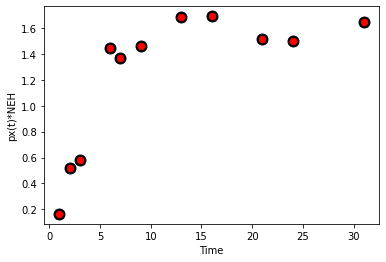

************** RMSE= 0.0008429305906503764 R square= 0.9999973308686365
[0.1645, 0.518, 0.581, 1.442, 1.3685, 1.4629999999999999, 1.687, 1.6905000000000001, 1.5154999999999998, 1.498, 1.645]

 estimated NEH 35


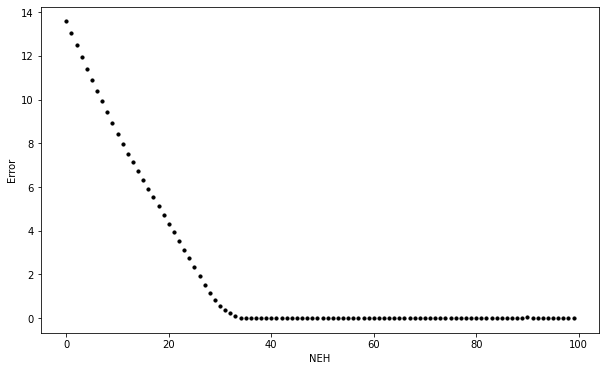


True NEH = 39 	 estimated NEHs median 35




 _SDEAVKPLGVK_2 Time 1 ==================================>
pxt*NEH = 0.1156 real_NEH= 19 ratio = 0.006084210526315789 

vals 0.15323673781506678

 _SDEAVKPLGVK_2 Time 2 ==================================>
pxt*NEH = 0.28140132 real_NEH= 19 ratio = 0.014810595789473685 

vals 0.34473471794879984

 _SDEAVKPLGVK_2 Time 3 ==================================>
pxt*NEH = 0.3741 real_NEH= 19 ratio = 0.019689473684210524 

vals 0.32571877701270663

 _SDEAVKPLGVK_2 Time 6 ==================================>
pxt*NEH = 0.7124993249999999 real_NEH= 19 ratio = 0.03749996447368421 

vals 0.698207687968917

 _SDEAVKPLGVK_2 Time 7 ==================================>
pxt*NEH = 0.730799391 real_NEH= 19 ratio = 0.03846312584210526 

vals 0.7024762526189785

 _SDEAVKPLGVK_2 Time 9 ==================================>
pxt*NEH = 0.8307987600000001 real_NEH= 19 ratio = 0.04372625052631579 

vals 0.8640021925159656

 _SDEAVKPLGVK_2 Time 13 ============================

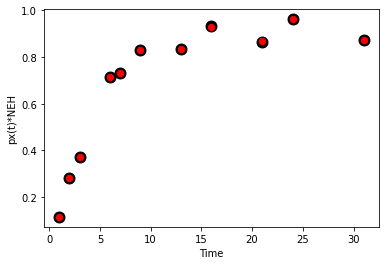

************** RMSE= 0.0006699666605141812 R square= 0.9999940838469142
[0.1166, 0.2816, 0.374, 0.7128, 0.7304, 0.8316, 0.8338000000000001, 0.9306, 0.8667999999999999, 0.9614, 0.8712000000000001]

 estimated NEH 22


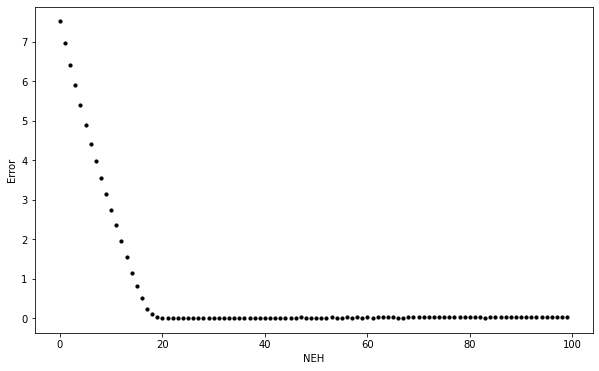


True NEH = 19 	 estimated NEHs median 22




 _SDEAVKPLGVK_3 Time 1 ==================================>
pxt*NEH = 0.129 real_NEH= 19 ratio = 0.006789473684210527 

vals 0.1106615271044391

 _SDEAVKPLGVK_3 Time 2 ==================================>
pxt*NEH = 0.34000008500000006 real_NEH= 19 ratio = 0.017894741315789477 

vals 0.2976272625747385

 _SDEAVKPLGVK_3 Time 3 ==================================>
pxt*NEH = 0.3132 real_NEH= 19 ratio = 0.01648421052631579 

vals 0.24715159215311439

 _SDEAVKPLGVK_3 Time 6 ==================================>
pxt*NEH = 0.717599376 real_NEH= 19 ratio = 0.03776838821052632 

vals 0.7084823640199802

 _SDEAVKPLGVK_3 Time 7 ==================================>
pxt*NEH = 0.7125034499999999 real_NEH= 19 ratio = 0.03750018157894736 

vals 0.7528626654321288

 _SDEAVKPLGVK_3 Time 9 ==================================>
pxt*NEH = 0.79200416 real_NEH= 19 ratio = 0.041684429473684205 

vals 0.8212609358834739

 _SDEAVKPLGVK_3 Time 13 =============================

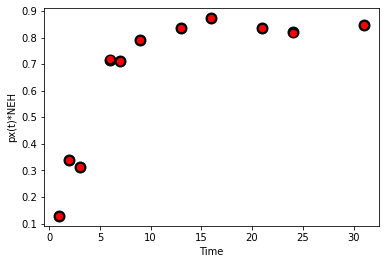

************** RMSE= 0.00048263862276228843 R square= 0.9999963273177065
[0.12919999999999998, 0.34009999999999996, 0.3135, 0.7182, 0.7125, 0.7923, 0.8379, 0.8721000000000001, 0.8379, 0.8189, 0.8474]

 estimated NEH 19


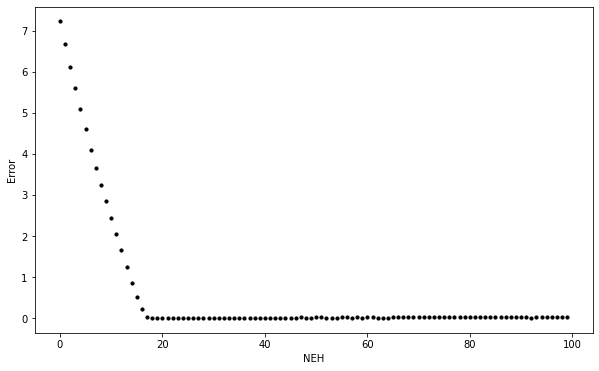


True NEH = 19 	 estimated NEHs median 19




 _VQEVQQVSTNK_2 Time 1 ==================================>
pxt*NEH = 0.111 real_NEH= 22 ratio = 0.005045454545454546 

vals 0.12723304989071438

 _VQEVQQVSTNK_2 Time 2 ==================================>
pxt*NEH = 0.37379999999999997 real_NEH= 22 ratio = 0.016990909090909088 

vals 0.35338434882639486

 _VQEVQQVSTNK_2 Time 3 ==================================>
pxt*NEH = 0.36000009000000005 real_NEH= 22 ratio = 0.016363640454545456 

vals 0.2936163321078215

 _VQEVQQVSTNK_2 Time 6 ==================================>
pxt*NEH = 0.91499925 real_NEH= 22 ratio = 0.041590875 

vals 0.8202860941658714

 _VQEVQQVSTNK_2 Time 7 ==================================>
pxt*NEH = 0.83999925 real_NEH= 22 ratio = 0.03818178409090909 

vals 0.8127319285316217

 _VQEVQQVSTNK_2 Time 9 ==================================>
pxt*NEH = 0.90480052 real_NEH= 22 ratio = 0.041127296363636365 

vals 0.9315959780895731

 _VQEVQQVSTNK_2 Time 13 ===============================

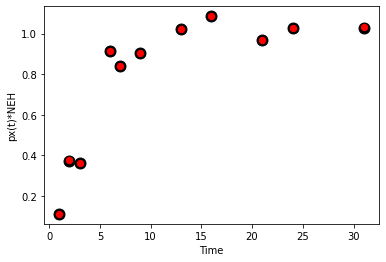

************** RMSE= 0.0007755874415974076 R square= 0.9999941683623341
[0.11039999999999998, 0.37489999999999996, 0.3611, 0.9154, 0.8394999999999999, 0.9039, 1.0212, 1.0856, 0.9682999999999999, 1.0258, 1.0304]

 estimated NEH 23


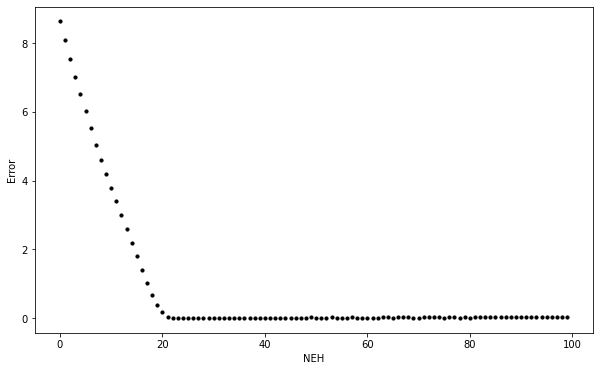


True NEH = 22 	 estimated NEHs median 23




 _VSDLLLSTDER_2 Time 1 ==================================>
pxt*NEH = 0.156 real_NEH= 18 ratio = 0.008666666666666666 

vals 0.10000031013853093

 _VSDLLLSTDER_2 Time 2 ==================================>
pxt*NEH = 0.414 real_NEH= 18 ratio = 0.023 

vals 0.32618842362669387

 _VSDLLLSTDER_2 Time 3 ==================================>
pxt*NEH = 0.427699909 real_NEH= 18 ratio = 0.023761106055555554 

vals 0.23085549759658017

 _VSDLLLSTDER_2 Time 6 ==================================>
pxt*NEH = 0.82839924 real_NEH= 18 ratio = 0.046022179999999996 

vals 0.6615010270986237

 _VSDLLLSTDER_2 Time 7 ==================================>
pxt*NEH = 0.81319924 real_NEH= 18 ratio = 0.04517773555555556 

vals 0.665211362642578

 _VSDLLLSTDER_2 Time 9 ==================================>
pxt*NEH = 0.80559924 real_NEH= 18 ratio = 0.04475551333333334 

vals 0.6362390047914224

 _VSDLLLSTDER_2 Time 13 ==================================>
pxt*NEH = 0.87399924 rea

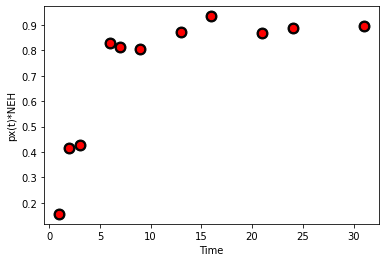

************** RMSE= 0.0005331400390722016 R square= 0.9999953778855655
[0.156, 0.414, 0.428, 0.828, 0.8140000000000001, 0.806, 0.8740000000000001, 0.9339999999999999, 0.868, 0.8899999999999999, 0.896]

 estimated NEH 20


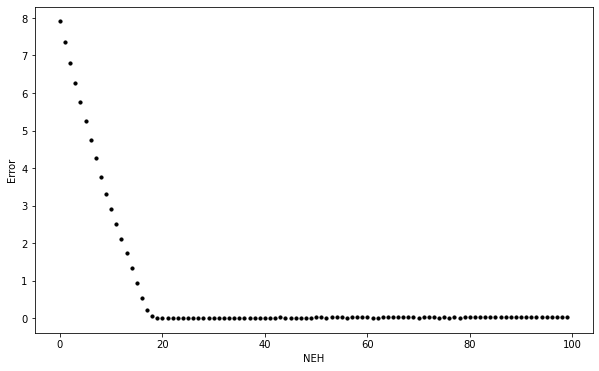


True NEH = 18 	 estimated NEHs median 20




 _VTAIYIDPATHR_3 Time 1 ==================================>
pxt*NEH = 0.1178 real_NEH= 22 ratio = 0.005354545454545455 

vals 0.13065029333816888

 _VTAIYIDPATHR_3 Time 2 ==================================>
pxt*NEH = 0.3185 real_NEH= 22 ratio = 0.014477272727272728 

vals 0.3263487316071131

 _VTAIYIDPATHR_3 Time 3 ==================================>
pxt*NEH = 0.294 real_NEH= 22 ratio = 0.013363636363636362 

vals 0.2875851829533048

 _VTAIYIDPATHR_3 Time 6 ==================================>
pxt*NEH = 0.74739926 real_NEH= 22 ratio = 0.033972693636363634 

vals 0.886014152938365

 _VTAIYIDPATHR_3 Time 7 ==================================>
pxt*NEH = 0.7801993420000001 real_NEH= 22 ratio = 0.03546360645454546 

vals 0.9194487854909997

 _VTAIYIDPATHR_3 Time 9 ==================================>
pxt*NEH = 0.85680414 real_NEH= 22 ratio = 0.03894564272727273 

vals 0.9760398112977545

 _VTAIYIDPATHR_3 Time 13 ==================================>


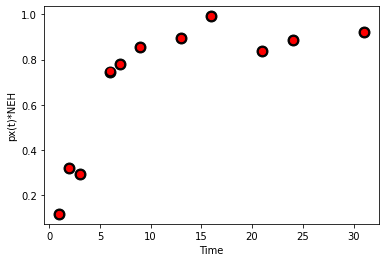

************** RMSE= 0.0005360847116881812 R square= 0.9999965281873086
[0.1176, 0.3192, 0.294, 0.7476, 0.7811999999999999, 0.8568, 0.8967, 0.9912, 0.84, 0.8862, 0.9239999999999999]

 estimated NEH 21


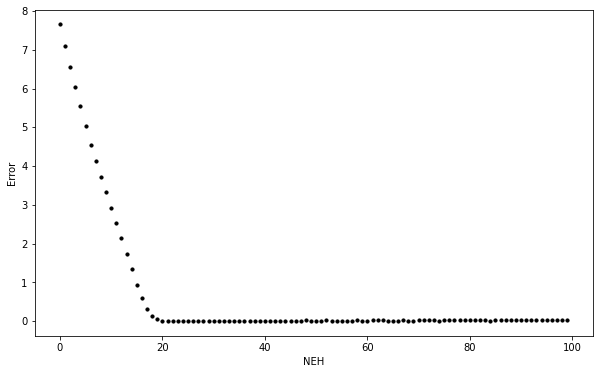


True NEH = 22 	 estimated NEHs median 21




 _WLSTSIPEAQWQSSLAR_2 Time 1 ==================================>
pxt*NEH = 0.23700000000000002 real_NEH= 38 ratio = 0.006236842105263159 

vals 0.15527722895184534

 _WLSTSIPEAQWQSSLAR_2 Time 2 ==================================>
pxt*NEH = 0.5236000000000001 real_NEH= 38 ratio = 0.013778947368421054 

vals 0.3205288063679858

 _WLSTSIPEAQWQSSLAR_2 Time 3 ==================================>
pxt*NEH = 0.5355 real_NEH= 38 ratio = 0.014092105263157894 

vals 0.20363170602646782

 _WLSTSIPEAQWQSSLAR_2 Time 6 ==================================>
pxt*NEH = 1.42079778 real_NEH= 38 ratio = 0.037389415263157894 

vals 0.8758019904007248

 _WLSTSIPEAQWQSSLAR_2 Time 7 ==================================>
pxt*NEH = 1.319998 real_NEH= 38 ratio = 0.034736789473684214 

vals 0.9620967385597059

 _WLSTSIPEAQWQSSLAR_2 Time 9 ==================================>
pxt*NEH = 1.4610075 real_NEH= 38 ratio = 0.038447565789473684 

vals 1.0186511677630234

 _WLSTSIPEAQ

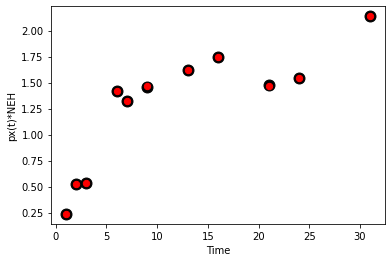

************** RMSE= 0.0012582789756539867 R square= 0.9999949427059791
[0.2385, 0.522, 0.5355000000000001, 1.4220000000000002, 1.3185, 1.4625000000000001, 1.6245, 1.7414999999999998, 1.4715, 1.548, 2.1375]

 estimated NEH 45


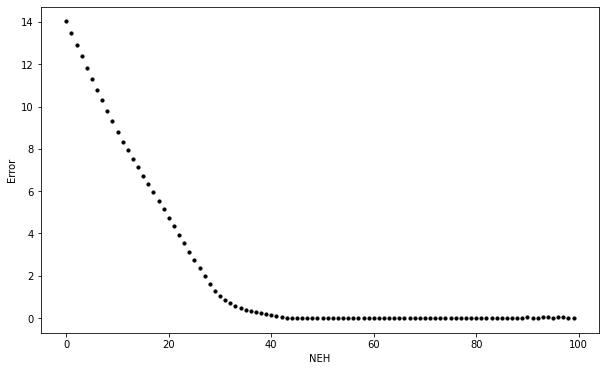


True NEH = 38 	 estimated NEHs median 45





In [74]:
vals=[]
# protein="CPSM_MOUSE"
protein="FAS_MOUSE"
# protein="ACADV_MOUSE"
# protein="ACADM_MOUSE"
for pep in pept:
    neh_coll=[]
    pxt_neh=[]
    for time in times:
        try:
            print(f"\n {pep} Time",time,"==================================>")
            data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{time}_{protein}.csv")

            data["const"]=data.NEH*data.pxt
            data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) ) )
            data["new_neh"]=data.const/data.new_pxt
            data=data.sort_values(by=["RMSE"],ascending=True)
            data=data[data.NEH<=data.NH]

            
            print("pxt*NEH =",float(data[data.RMSE==min(data.RMSE)].const),"real_NEH=",data.T_NEH[0], "ratio =",float(data[data.RMSE==min(data.RMSE)].const/data.T_NEH[0]),"\n")
            print("vals",(data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))
            
            pxt_neh.append(float(data[data.RMSE==min(data.RMSE)].const))
            
            tempdata=data[data.RMSE<2.5*min(data.RMSE)]
            tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
            tempdata["pxt_dif"]=((abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2)**0.5 #(abs((tempdata.pxt) - (tempdata.new_pxt))) 
            tempdata=tempdata.sort_values(by=["pxt_dif"])
            
            neh_coll=neh_coll+list(np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            
        except:
            print("Error",time)

    print("\n",pxt_neh)
    
    eneh=estimateneh(pxt_neh)
    print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",eneh)
    
    vals.append([pep,data.T_NEH[0],eneh])
    print("===============================================================\n")
    print("===============================================================\n")
    print("===============================================================\n")

In [75]:
res=pd.DataFrame(vals,columns=["Peptieds","True NEH","Estimated NEH"])
res["diff"]=abs(res["True NEH"]-res["Estimated NEH"])
res.sort_values(by="diff").head(50)

,Peptieds,True NEH,Estimated NEH,diff
8,_LLLPEDPLISGLLNSQALK_2,33,33,0
4,_LDPGSPELQQVLK_2,26,26,0
6,_LGMLSPDGTcR_2,18,18,0
12,_SDEAVKPLGVK_3,19,19,0
1,_DAMLENQTPELFQDVNKPK_3,37,36,1
2,_FPQLDDTSFANSR_2,26,27,1
13,_VQEVQQVSTNK_2,22,23,1
15,_VTAIYIDPATHR_3,22,21,1
9,_LLLPEDPLISGLLNSQALK_3,33,34,1
14,_VSDLLLSTDER_2,18,20,2


In [76]:
print( float(res[["diff"]].mean()),float(res[["diff"]].median()),float(res[["diff"]].std()))

2.0 1.0 2.0615528128088303


In [ ]:
# data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv")
data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_24_FAS_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

In [ ]:

ph

In [ ]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [ ]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)

data["test"]= 1-ph-data.pxt == (data.NEH*data.pxt)/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) )

data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]



# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(20)

In [ ]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

from sklearn.decomposition import PCA

pca = PCA() # Compute PCA
pca.fit_transform(  data[["const","RMSE"]])
eigenvalues = pca.explained_variance_ # Get eigenvalues
eigenvalues = np.round(eigenvalues, 8) # Round off eigenvalues
eigenvalues

In [ ]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(15,6))
plt.scatter(data.const,data.RMSE,s=1)
print(data[data.new_pxt<0].shape)

In [ ]:
tempdata=data[data.RMSE<2*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
tempdata.sort_values(by=["pxt_dif"]).head(25)

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(tempdata.const,tempdata.RMSE,s=1)

In [ ]:
np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
np.median(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
# plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

In [ ]:
# plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])

In [ ]:
np.array([0.2475, 0.47250000000000003, 0.345, 1.3425, 0.9825, 1.2075, 1.0725, 1.1925000000000001, 1.1775, 1.1175, 1.335])/75

In [ ]:
np.array([[0.16119999999999998, 0.3952, 0.41340000000000005, 0.9229999999999999, 0.9776, 0.9672, 1.0842, 1.183, 1.0608, 1.1258, 1.0972]])/26